In [1]:
import numpy as np 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

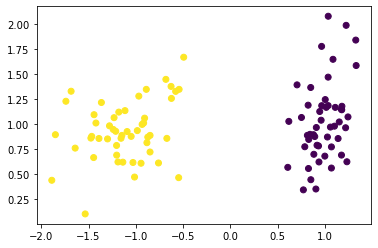

In [3]:
X, y = make_classification(n_features=2,n_redundant=0, n_informative=2,n_clusters_per_class=1, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [56]:
#defining the sigmoid function 

def sigmoid(z):
    return  1.0/(1 + np.exp(-z))

In [57]:
# cal loss function i.e cal the errors 
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss


In [58]:
## updating our weight and bias
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> Actual value.
    # y_hat --> predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [59]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    n = X.shape[1]
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [60]:
def train(X, y, bs, itera, alphaa):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size; is the number of samples that will be passed through to the network at one time
    # iter --> Number of iterations.
    # alphaa --> Learning rate.
        
    # m-> number of training set
    # n-> number of features 
    m, n = X.shape
        # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
        # Reshaping y.
    y = y.reshape(m,1)
        # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for iter in range(itera):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= alphaa*dw
            b -= alphaa*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [61]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [64]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

accuracy(y, y_hat=predict(X))


1.0